# <font color=red>other</font>

In [1]:
! pip install missingno


# Dataset Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

######################################

import numpy as np
import scipy.stats as sc
import pandas as pd

import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from statsmodels.stats import outliers_influence as oi

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import metrics 


#######################################################

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

######################################

#from sklearn.datasets import load_iris
from sklearn import preprocessing

from scipy import interp
from sklearn import datasets, neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler, \
 InstanceHardnessThreshold, RepeatedEditedNearestNeighbours,NeighbourhoodCleaningRule


from imblearn.pipeline import make_pipeline

######################################
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 250)
sns.set()

## Basic Info

In [3]:
dsdata = pd.read_excel('Data/full_dataset.xlsx')
dsdata = dsdata.replace('unknown', np.nan)
dsdata = dsdata.replace('nonexistent', np.nan)

dsdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dsdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Input variables:
#### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Variable Description

In [5]:
#describe the "Object" type elements

dsdata.describe(include=['O']) 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,5625,41188
unique,11,3,7,2,2,2,2,10,5,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,failure,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,4252,36548


In [6]:
#describe the "numerical" type elements

dsdata.describe() 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
dsdata['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## Variable Distribution

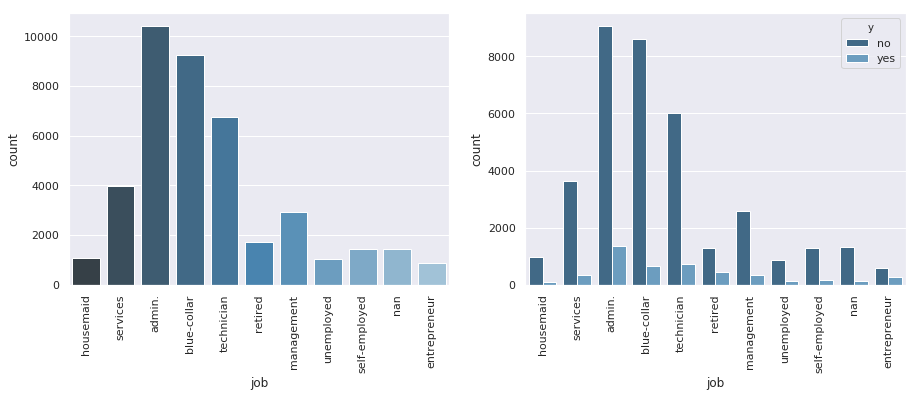

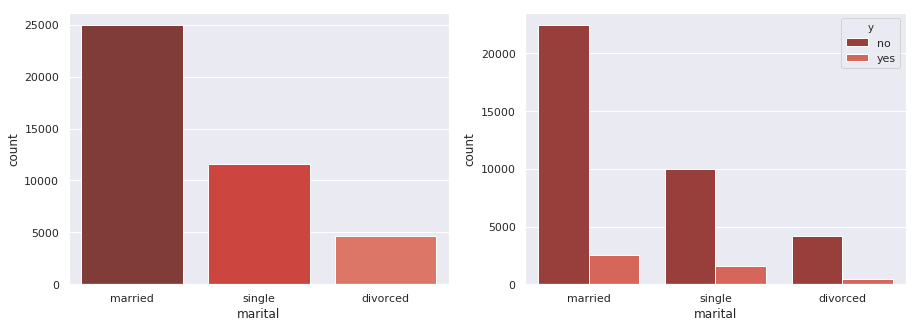

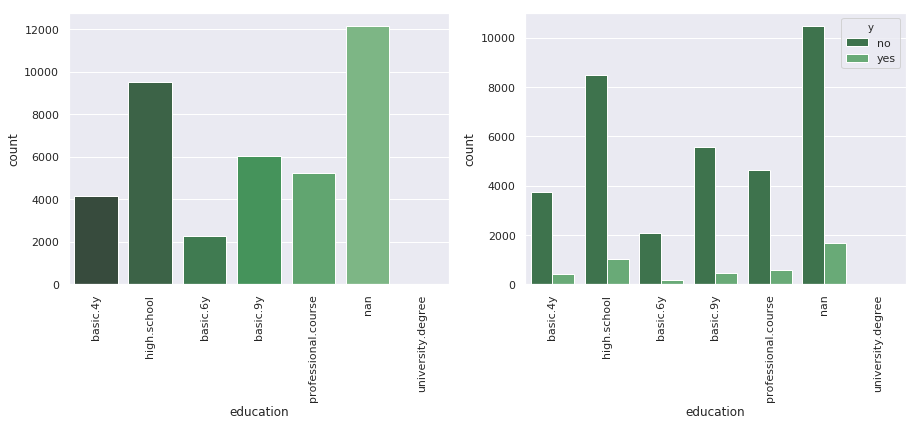

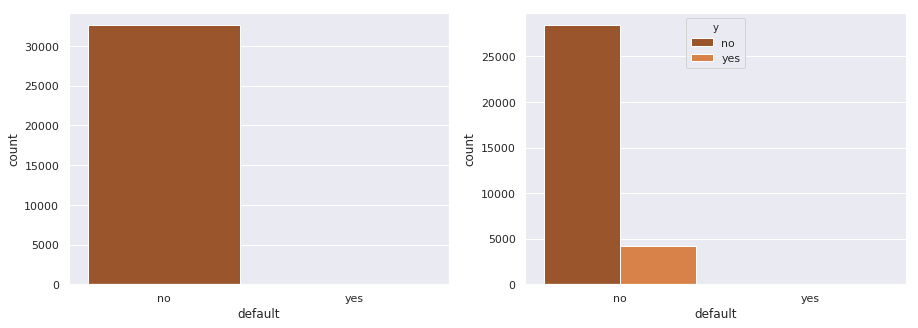

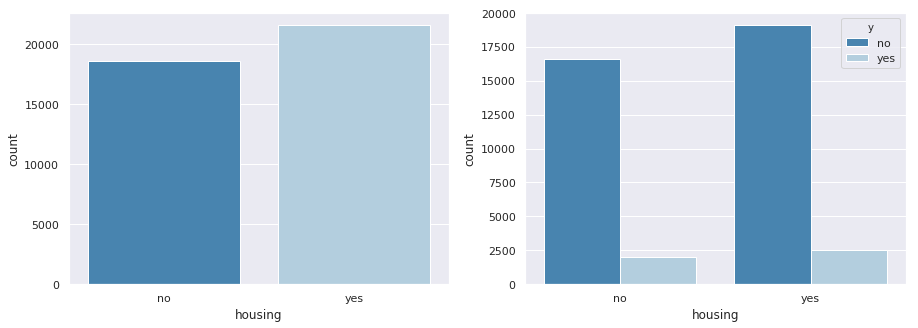

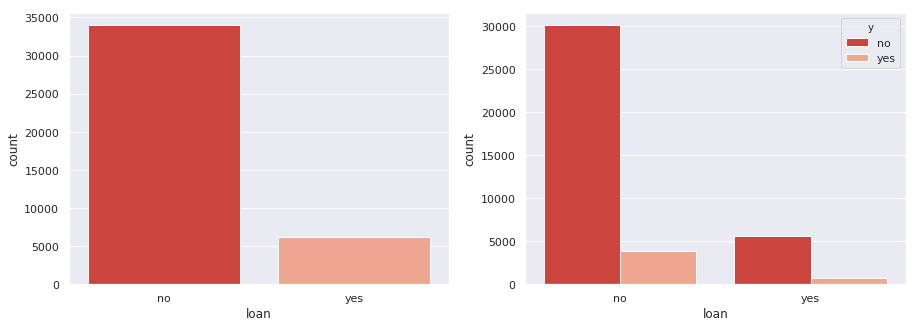

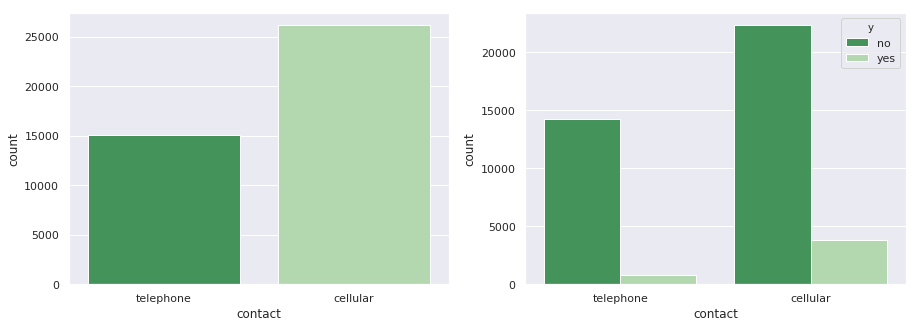

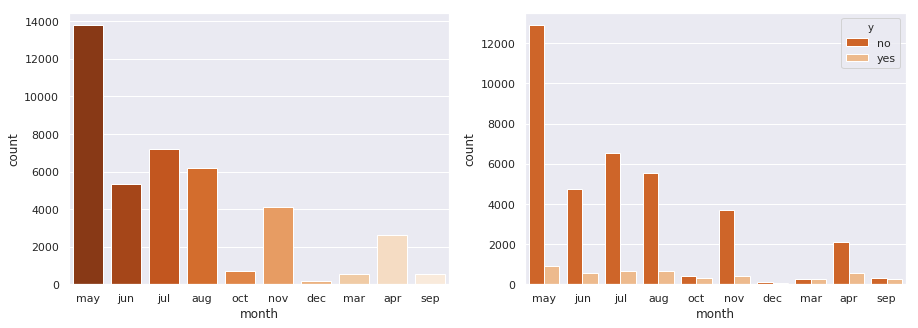

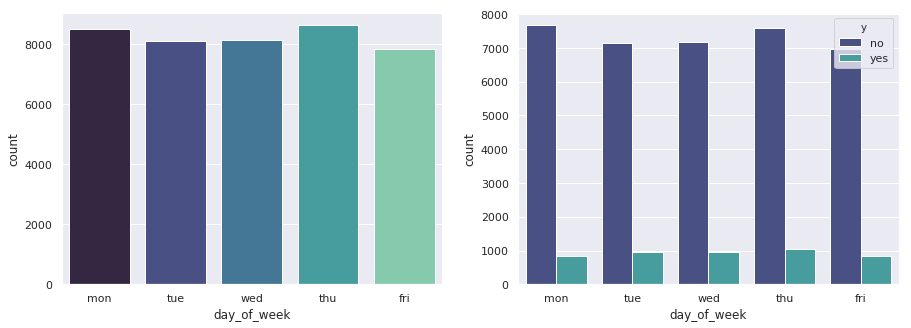

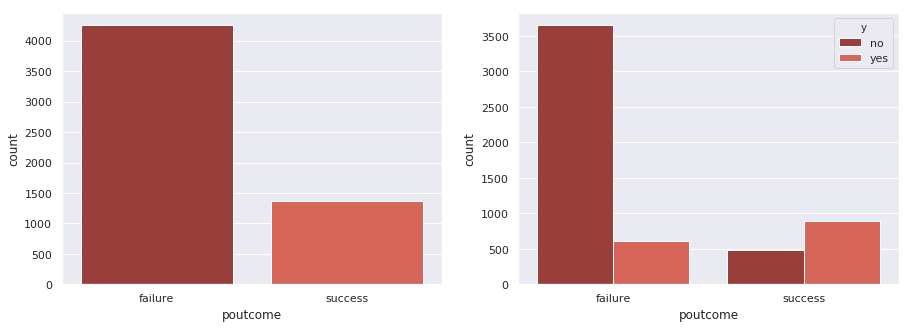

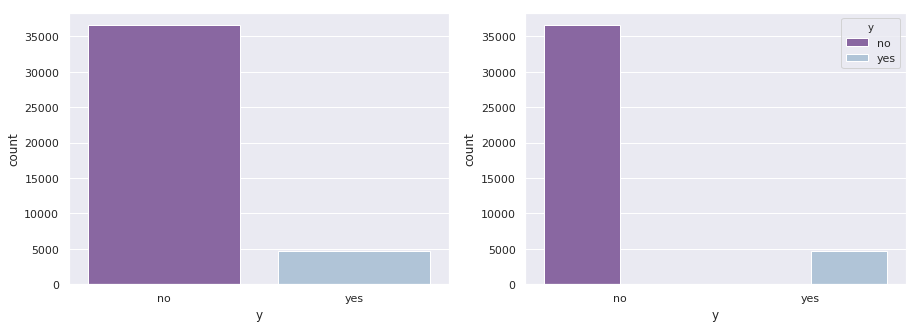

In [8]:
# Barplots for categorical (object) variables
column = "job"
colors = ['Blues_d', 'Reds_d', 'Greens_d', 'Oranges_d', 'Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'mako', 'Reds_d','BuPu_r']
color_coef=0
for column in dsdata.columns:
    if dsdata[column].dtype == "O":
        if column=='job' or column=='education':
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            t = t.set_xticklabels(dsdata[column].unique(), rotation=90)
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
            t = g.set_xticklabels(dsdata[column].unique(), rotation=90)
        else:
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
        color_coef +=1

In [9]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {}".format(variable))
    ax = sns.distplot(dsdata[variable],color=sns.color_palette("RdYlGn_r")[0])
    
def histogram_by_deposit(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {} with deposit".format(feature))
    ax0 = sns.distplot(dsdata[dsdata["y"]=="no"][feature],color=sns.color_palette("Pastel2")[0],label="deposit_No")
    ax1 = sns.distplot(dsdata[dsdata["y"]=="yes"][feature],color=sns.color_palette("Pastel2")[2],label="deposit_Yes")
    plt.legend()

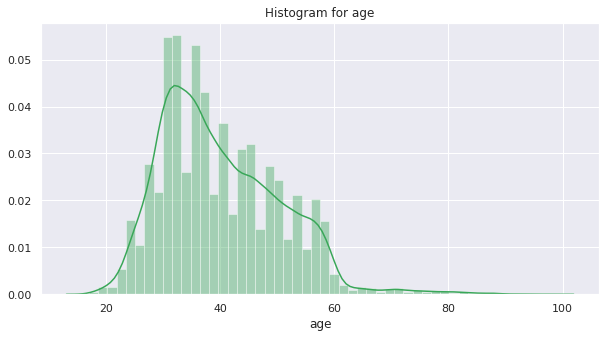

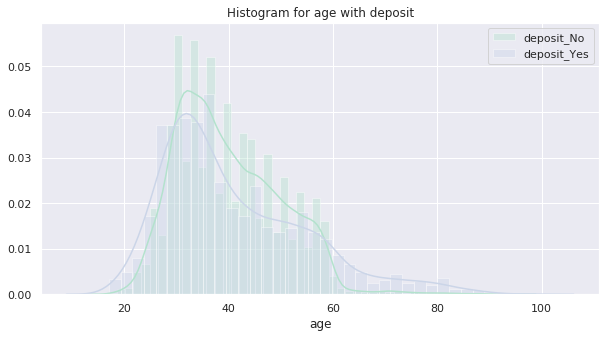

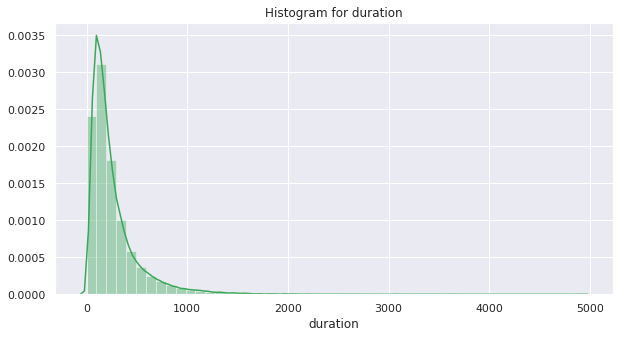

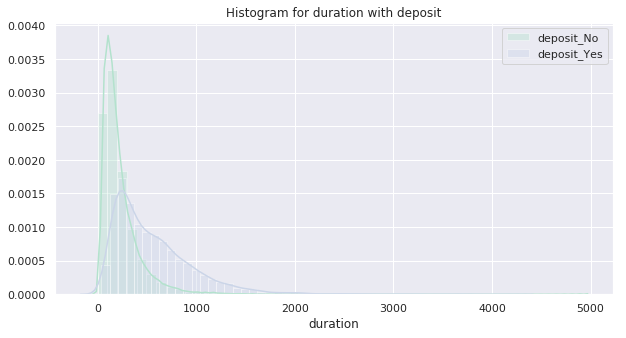

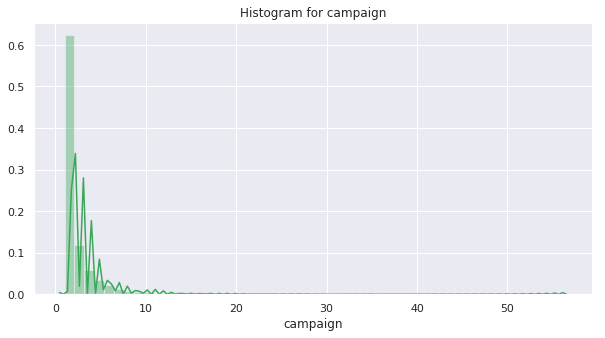

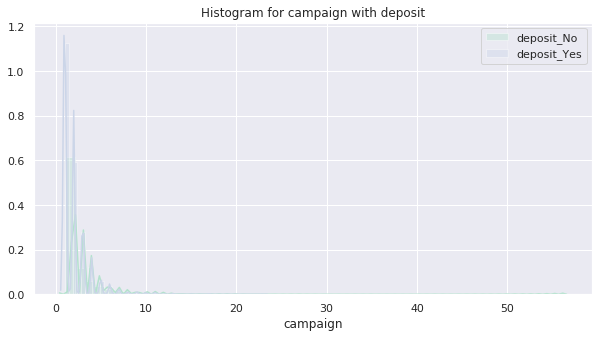

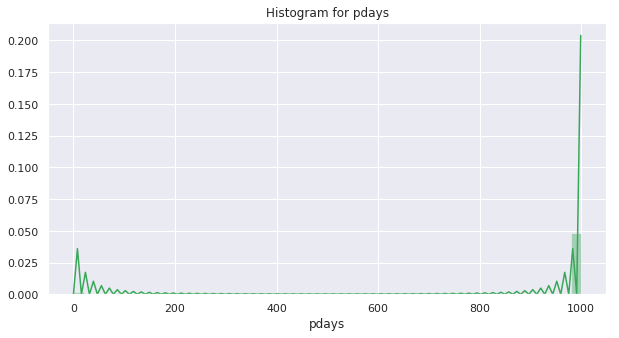

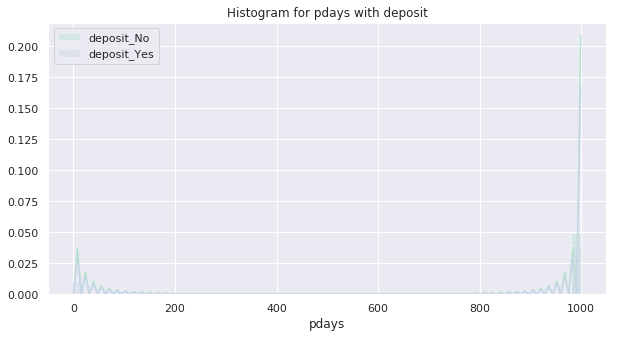

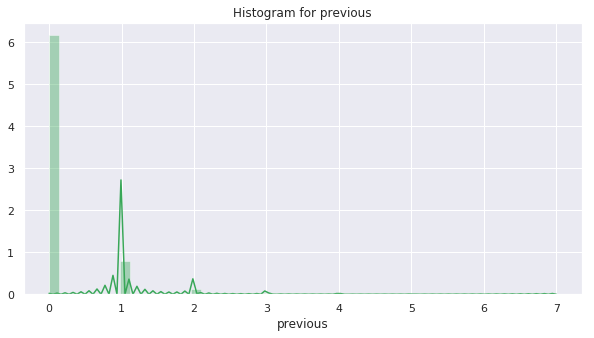

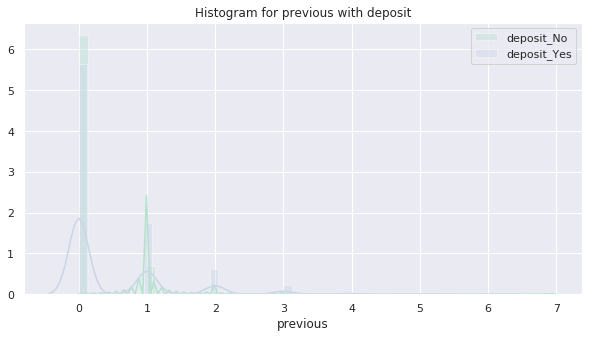

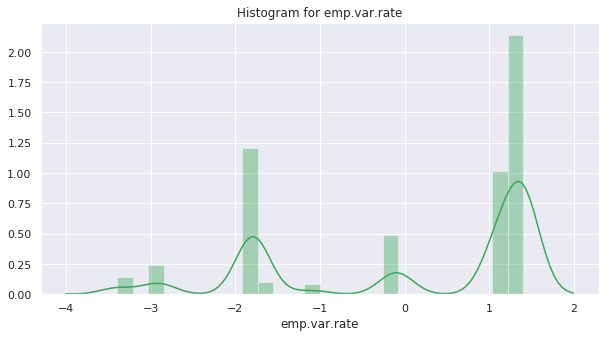

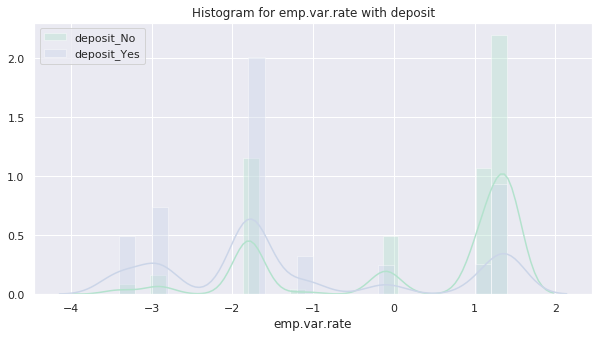

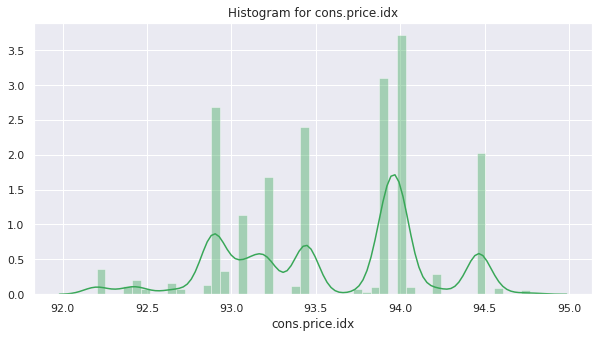

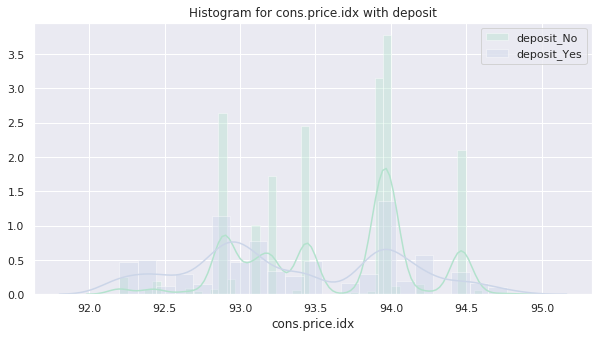

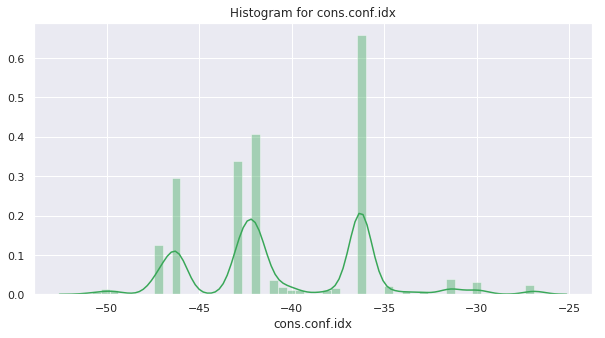

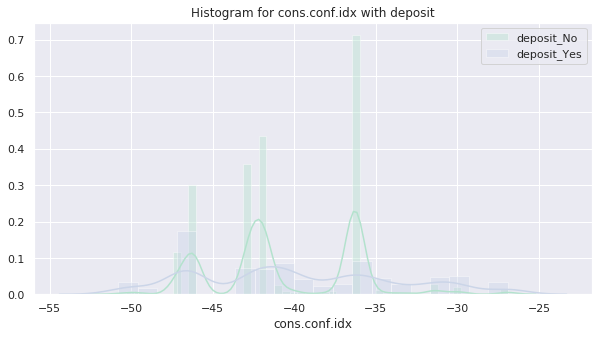

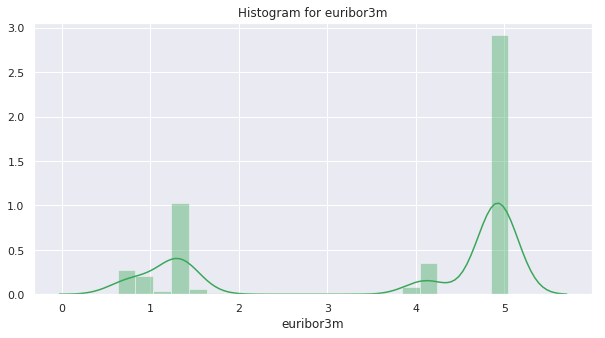

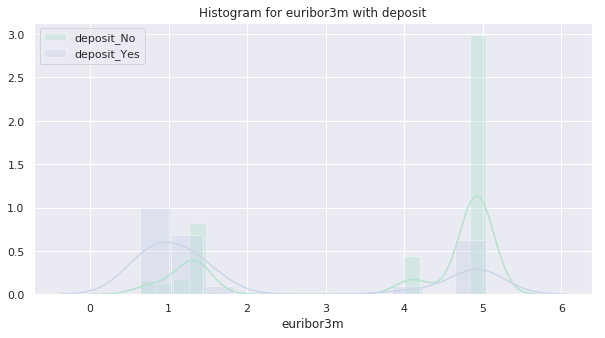

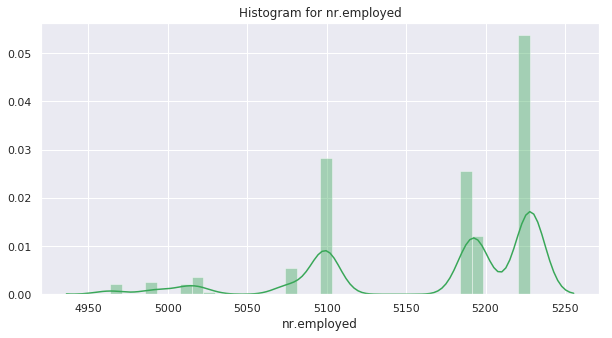

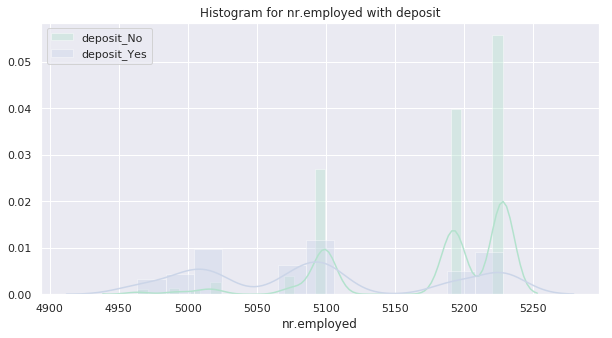

In [10]:
# histogram for numerical variables
column = "job"
for column in dsdata.columns:
    if dsdata[column].dtype == "int64" or dsdata[column].dtype == "float64":
        histogram(column)
        histogram_by_deposit(column)

# Missing Data Handling

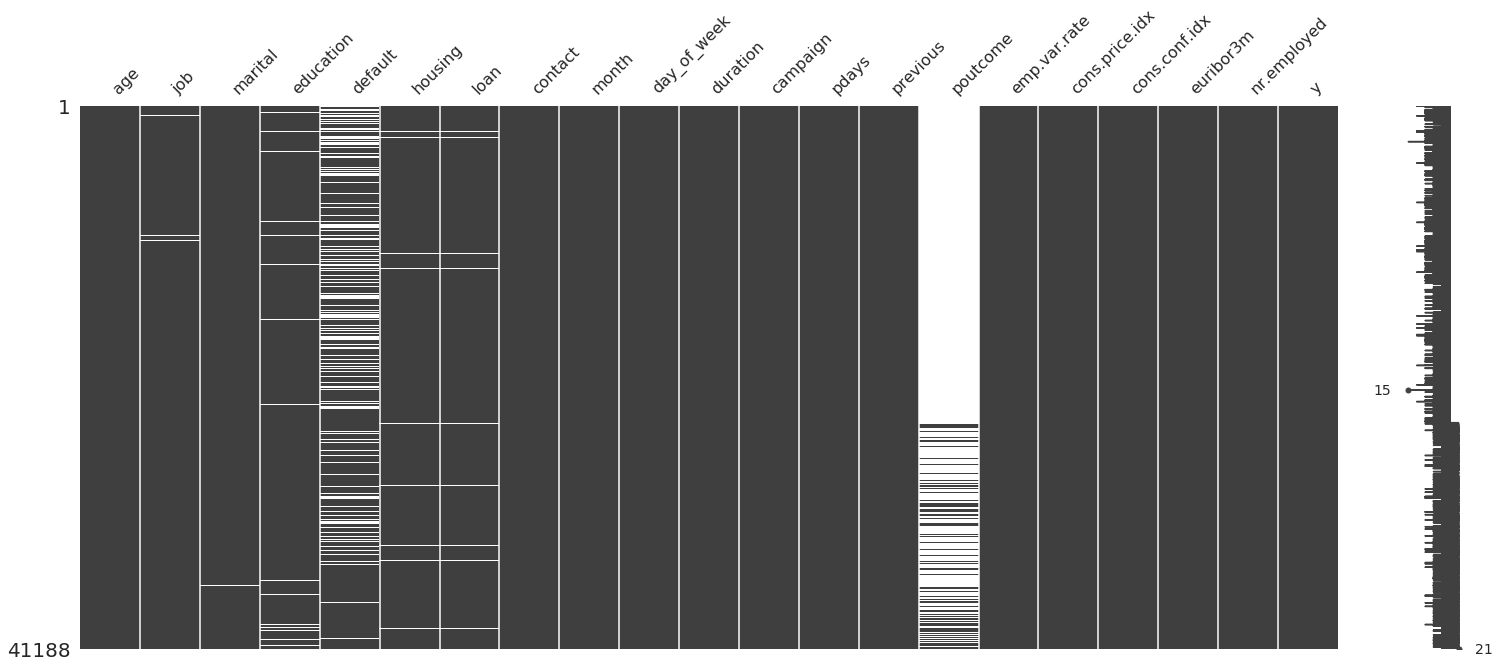

In [11]:
#visualizing missing data

msno.matrix(dsdata) 
plt.show()

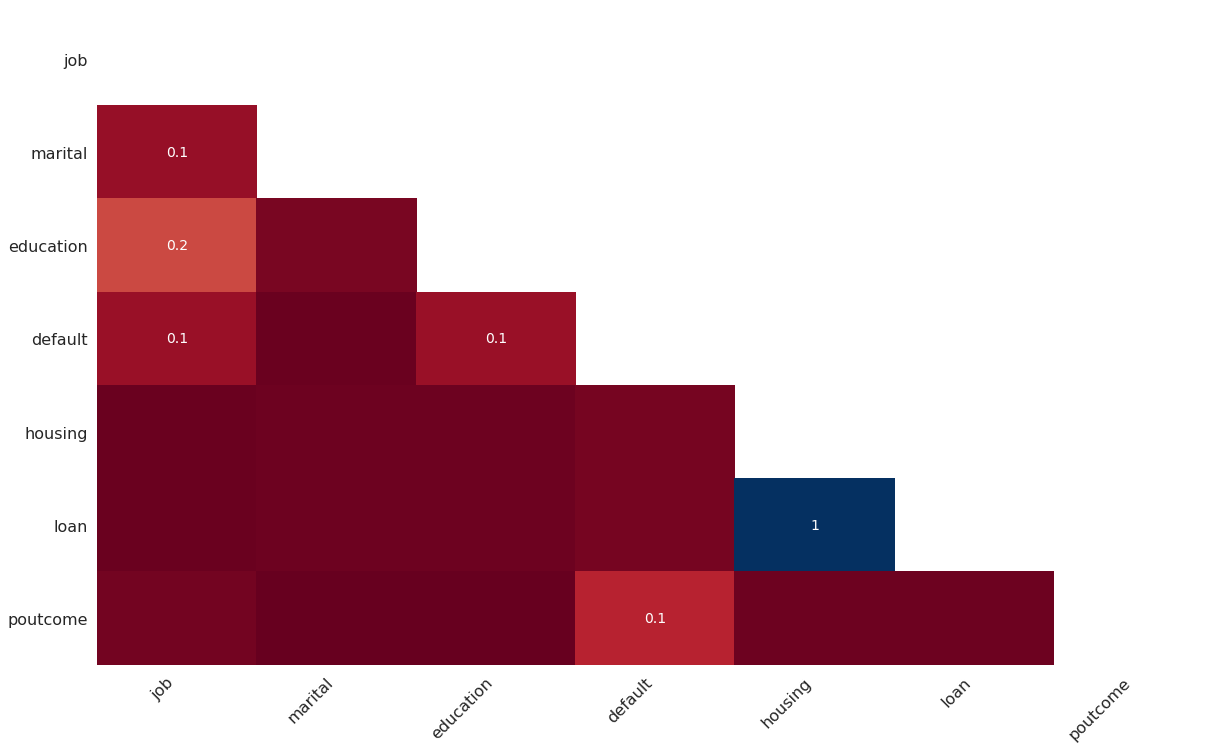

In [12]:
#nullity correlation: how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(dsdata)
plt.show()
missing = ['job','marital','education','default','housing','loan','poutcome']
ds_missing = dsdata[missing]

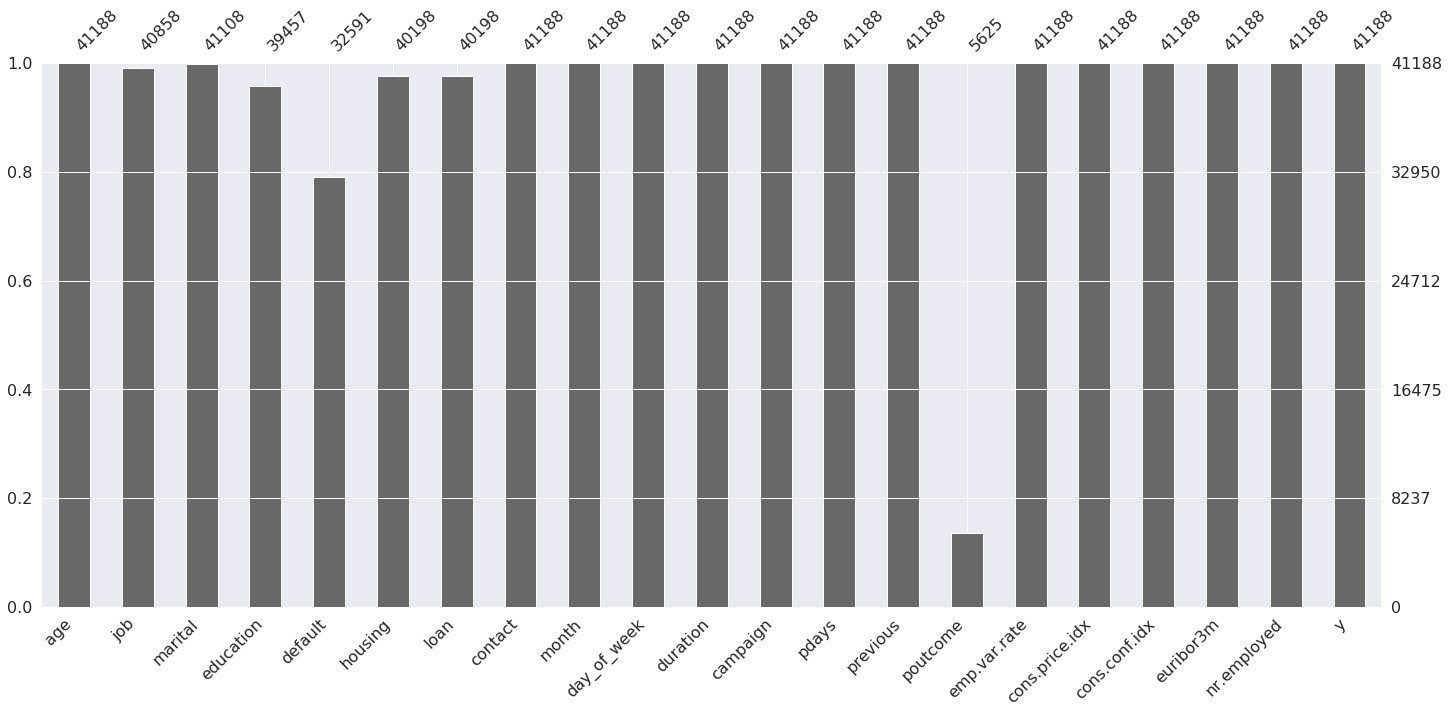

In [13]:
msno.bar(dsdata)
plt.show()

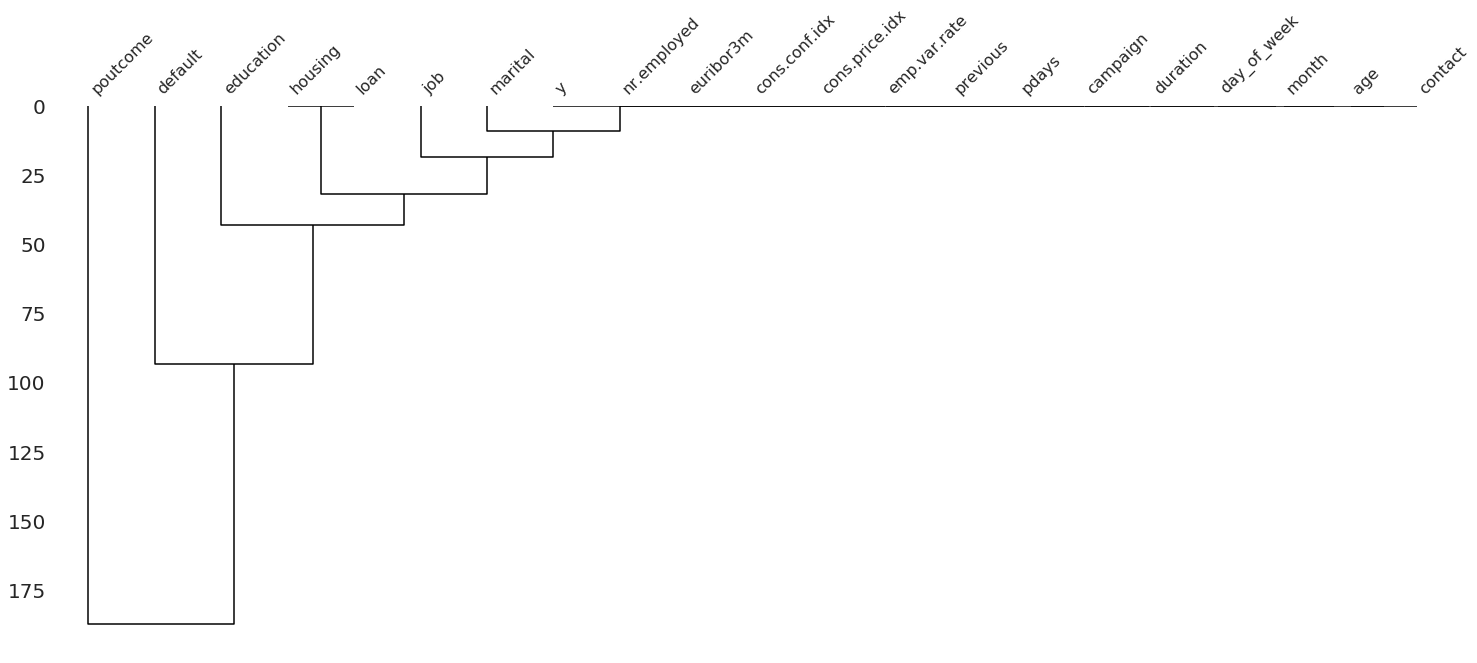

In [14]:
msno.dendrogram(dsdata)
plt.show()

In [15]:
#ds_missing.head(25)

In [16]:
for col in list(ds_missing.columns):
    print(ds_missing[col].value_counts(),'\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64 

no     32588
yes        3
Name: default, dtype: int64 

yes    21576
no     18622
Name: housing, dtype: int64 

no     33950
yes     6248
Name: loan, dtype: int64 

failure    4252
success    1373
Name: poutcome, dtype: int64 



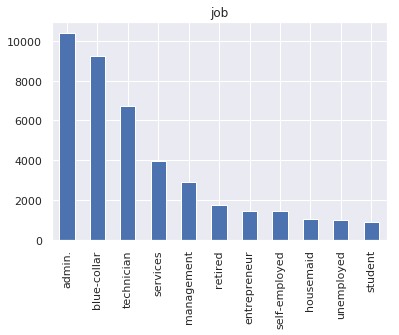

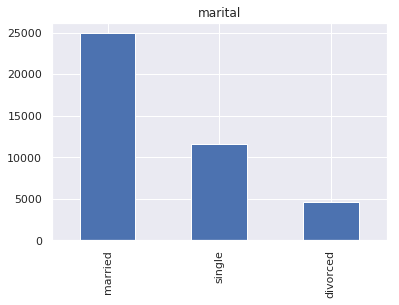

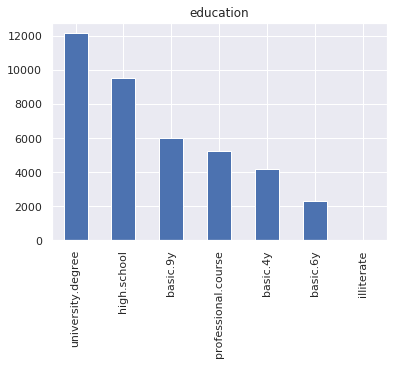

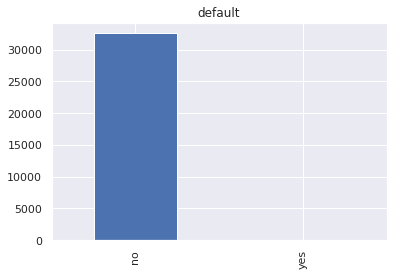

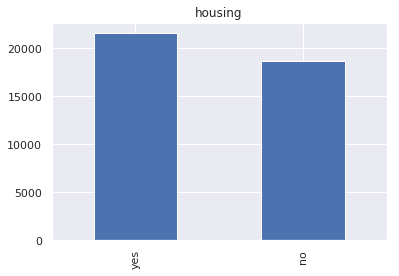

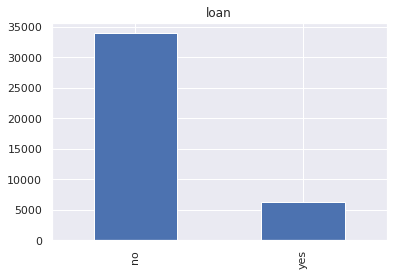

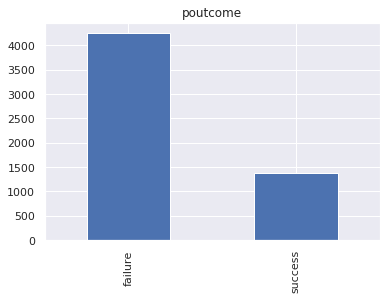

In [17]:
for col in list(ds_missing.columns):
    if ds_missing[col].dtype == "O":
        ds_missing[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()


In [18]:
ds_missing.head(5)

,job,marital,education,default,housing,loan,poutcome
0,housemaid,married,basic.4y,no,no,no,NaN
1,services,married,high.school,NaN,no,no,NaN
2,services,married,high.school,no,yes,no,NaN
3,admin.,married,basic.6y,no,no,no,NaN
4,services,married,high.school,no,no,yes,NaN


In [19]:
missing2 = ['job', 'marital', 'education', 'housing', 'loan']

## Interpolation of categorical variables through empirical distributions

In [20]:
dsdata2 = dsdata.copy()
dsdata2 = dsdata2.drop(columns=['poutcome','default']) #too many missing values, and zero variance variable
#dsdata2.shape

In [21]:
#fill missing data at random from discrete distribution corresponding to histogram
def dist_random_selection(col, num):
    arr = list(col.value_counts().index)
    prob = np.array(list(col.value_counts().values))
    p_norm = prob.sum()
    prob = prob/p_norm
    return np.random.choice(arr, num, replace=True, p=prob)

def fill_missing(data,missing):
    for col in list(data[missing].columns):
        count = len(data[col][data[col].isnull()])
        data[col][data[col].isnull()] = dist_random_selection(data[col],count)
    return data
    


In [22]:
dsdata3 = fill_missing(dsdata2, missing2)

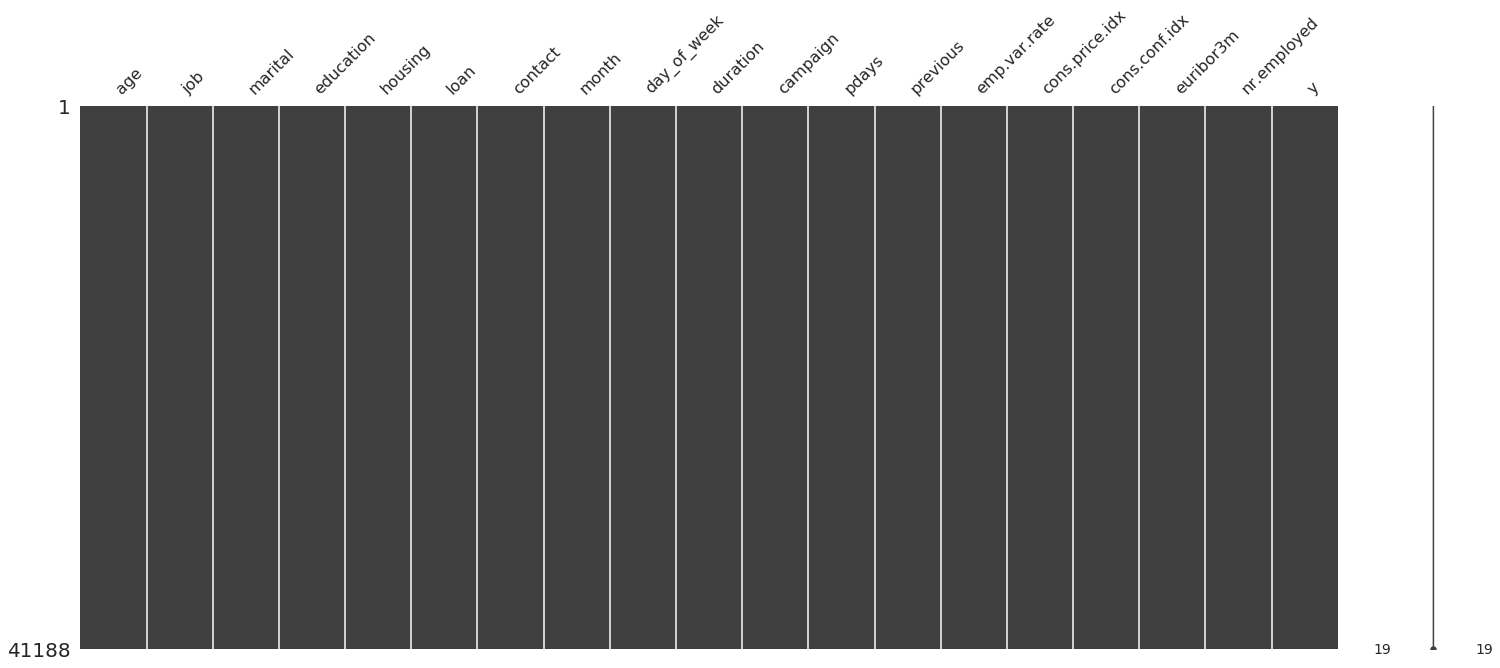

In [23]:
msno.matrix(dsdata3) 
plt.show()

# Feature Selection

In [24]:
dsdata3.shape

(41188, 19)

In [25]:
# Data preparation
dsn = dsdata3.copy()
dsn.describe(include=['O']) 
# Drop missing value
#dsn2 = dsn.copy().dropna() HELL NO!!!!!!! XD, 
# That drops about 10,000 columns...

,job,marital,education,housing,loan,contact,month,day_of_week,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,10,5,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,no
freq,10496,24975,12699,22088,34789,26144,13769,8623,36548


In [26]:
# Create dummy
def make_dummies(dsn):
    numvar = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
    nonnumvar = ['job','marital','education','month','day_of_week'] #WE ONLY NEED THE CATEGORICALS, DONT INCLUDE BINARIES!!

    for c,var in enumerate(nonnumvar):  
        dummy = pd.get_dummies(dsn[var],drop_first=True)
        dsn = dsn.drop(columns=[var])
        dsn = pd.concat([dsn, dummy], axis=1)
        #print(var)
        #display(dummy.head(5))
    return dsn

def make_numeric(dsn):
    for c,var in enumerate(['housing','loan','contact']):
        dsn[var] = dsn[var].astype("category").cat.codes

    return dsn

dsn2 = make_dummies(dsn) #make dummies out of categoricals
dsn2 = make_numeric(dsn2) #make binaries out of yes/no
dsn2.info()
#dsn2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
age                    41188 non-null int64
housing                41188 non-null int8
loan                   41188 non-null int8
contact                41188 non-null int8
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
emp.var.rate           41188 non-null float64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
euribor3m              41188 non-null float64
nr.employed            41188 non-null float64
y                      41188 non-null object
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null uint8
management             41188 non-null uint8
retired                41188 non-null uint8
self-employed          41188 non-null uint8
ser

In [27]:
# Drop priori 
dsn3 = dsn2.drop(columns=['duration']) #remove output and duration, which should not be known a priori


In [28]:
# Data Normalization

# separate the data from the target attributes
X = dsn3.drop(columns=['y'])
#Y = pd.get_dummies(dsn3['y'],drop_first=True,dummy_na=True)

# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [29]:
# MAKE NORMALIZED DF
X_n = pd.DataFrame(normalized_X)
X_n.columns = X.columns

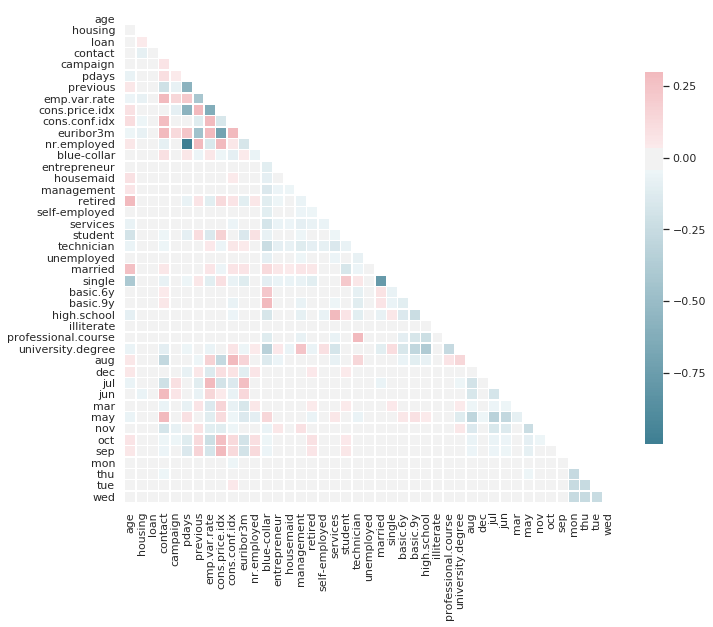

In [30]:
# Check the correlation

# NORMALIZE THE DATA !
corr = X_n.corr()
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .76})
f.show()

## Feature Selection

In [31]:
def print_VIF(X):
    colnames = list(X.columns)
    for i in range(X.shape[1]):
        print(oi.variance_inflation_factor(X.values, i), colnames[i])
        
print("Variance Inflation Factors:")        
print_VIF(X)

Variance Inflation Factors:
25.662038316189555 age
2.1838868374837643 housing
1.1880228530486683 loan
5.169005216633967 contact
1.9404292024529377 campaign
45.31819282851312 pdays
2.0805963325361447 previous
93.69791366493433 emp.var.rate
62390.101834251866 cons.price.idx
389.9529468315722 cons.conf.idx
785.3290246520022 euribor3m
80109.62902408911 nr.employed
3.000964565555525 blue-collar
1.1789523457512707 entrepreneur
1.2108337999238552 housemaid
1.34158306903928 management
1.5442641925520768 retired
1.158587808903535 self-employed
1.5644072613009934 services
1.1954393478970835 student
2.0795683587192055 technician
1.1241848452619825 unemployed
6.550282784183289 married
4.029670064449989 single
1.6003069593152077 basic.6y
2.640002900742175 basic.9y
4.350814739712817 high.school
1.0051742335424707 illiterate
3.025125202129132 professional.course
5.733432109701707 university.degree
8.133309748051639 aug
1.1410875929412174 dec
5.437308181777535 jul
3.782406503595711 jun
1.2543656480655

### intermediate regression on economic variables for VIF

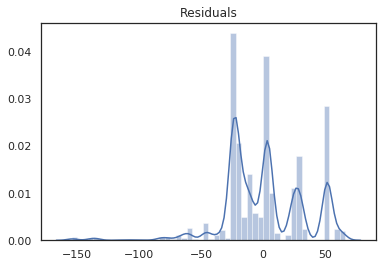

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.623e+08
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        12:51:09   Log-Likelihood:            -2.0167e+05
No. Observations:               41188   AIC:                         4.034e+05
Df Residuals:                   41184   BIC:                         4.034e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -63.3977      0.445   -142.626      0.000     -64.269     -62.526
x2            50.2830      0.027   1890.625      0.000      50.231      50.335
x3            -3.7858      0.038    -99.832      0.000      -3.860      -3.711
x4            86.5789      0.416    208.289      0.000      85.764      87.394
==============================================================================
Omnibus:                     3472.453   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9896.607
Skew:                          -0.464   Prob(JB):                         0.00
Kurtosis:                       5.215   Cond. No.                         387.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
economic = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']
numeric = sm.OLS(X['nr.employed'].values,X[economic].values).fit()
sns.distplot(numeric.resid)
plt.title("Residuals")
plt.show()
display(numeric.summary())

In [33]:
dsn4 = X.copy()
dsn4 = X.drop(columns=['nr.employed','euribor3m','cons.price.idx','cons.conf.idx'])
        
print("Variance Inflation Factors:")        
print_VIF(dsn4)

Variance Inflation Factors:
18.79665231642242 age
2.1641148808991875 housing
1.1861195262087487 loan
3.7648027924736973 contact
1.9217016730447574 campaign
27.255420187452515 pdays
1.732080669264468 previous
2.5143661392955594 emp.var.rate
2.8265834873880094 blue-collar
1.1724594224146017 entrepreneur
1.1947977128853997 housemaid
1.3386005872007771 management
1.5381875269535579 retired
1.1539941572196677 self-employed
1.5401958790820978 services
1.1680348821843405 student
2.0474208939112386 technician
1.1159870732885802 unemployed
6.034041762421808 married
3.5386947764315386 single
1.5295648247509028 basic.6y
2.4241056441596482 basic.9y
3.777822753764264 high.school
1.0046608707789206 illiterate
2.765546403627855 professional.course
4.889394658678979 university.degree
3.920506010043168 aug
1.0773231911424206 dec
4.413965083694044 jul
3.358951149297555 jun
1.1878126459621632 mar
6.320033428771635 may
2.5120815092234676 nov
1.2740194002306906 oct
1.2192252447971808 sep
2.0511564080228415

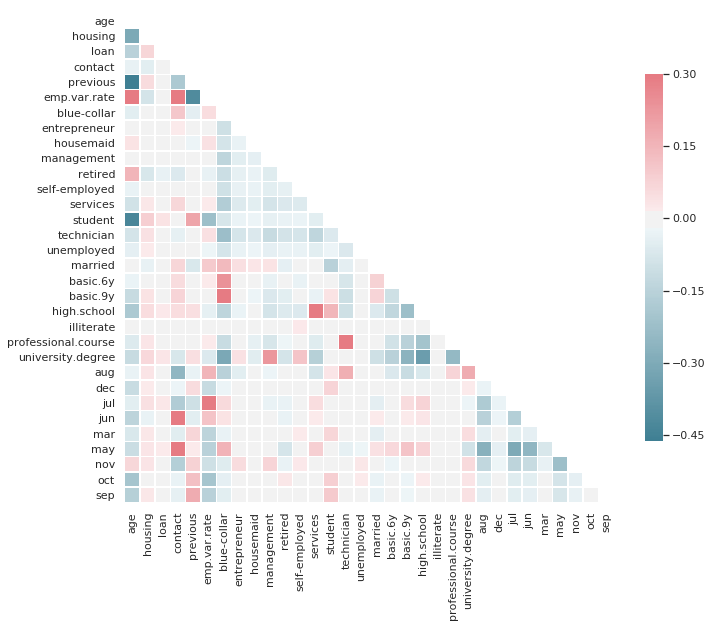

In [34]:
dsn4 = dsn4.drop(columns=['pdays'])
dsn4 = dsn4.drop(columns=['mon','thu','tue','wed'])
dsn4 = dsn4.drop(columns=['single'])
dsn4 = dsn4.drop(columns=['campaign'])

# NORMALIZE THE DATA !
normalized_X = preprocessing.normalize(dsn4)

X_n = pd.DataFrame(normalized_X)
X_n.columns = dsn4.columns


#plt.figure(figsize=(12,8))
corr = X_n.corr()

# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.show()

## Outlier Detection

### PCA 

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [36]:
X = dsn4#dsn4.drop(columns=['y'])

#sns.pairplot(X)
# Plot the data
#fig = plt.figure(figsize=(12,8))
#with plt.style.context(('ggplot')):
#    plt.plot( X.T)
#    plt.show()


In [37]:
pcaX = PCA().fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))
# PCA & score 

In [38]:
# Compute the euclidean distance ( 3 PC )
euclidean = np.zeros(X.shape[0])
for i in range(3):
    euclidean += (pcaX[:,i] - np.mean(pcaX[:,:3]))**2/np.var(pcaX[:,:3])
    
#colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]


In [39]:
X_pca = pd.DataFrame(pcaX, columns=['PCA%i' % i for i in range(X.shape[1])], index=X.index)

In [40]:
colors = ["blue", "blue"]
pal = sns.xkcd_palette(colors)

pal = [sns.cubehelix_palette(light=1)[1], sns.cubehelix_palette(light=1)[4]]

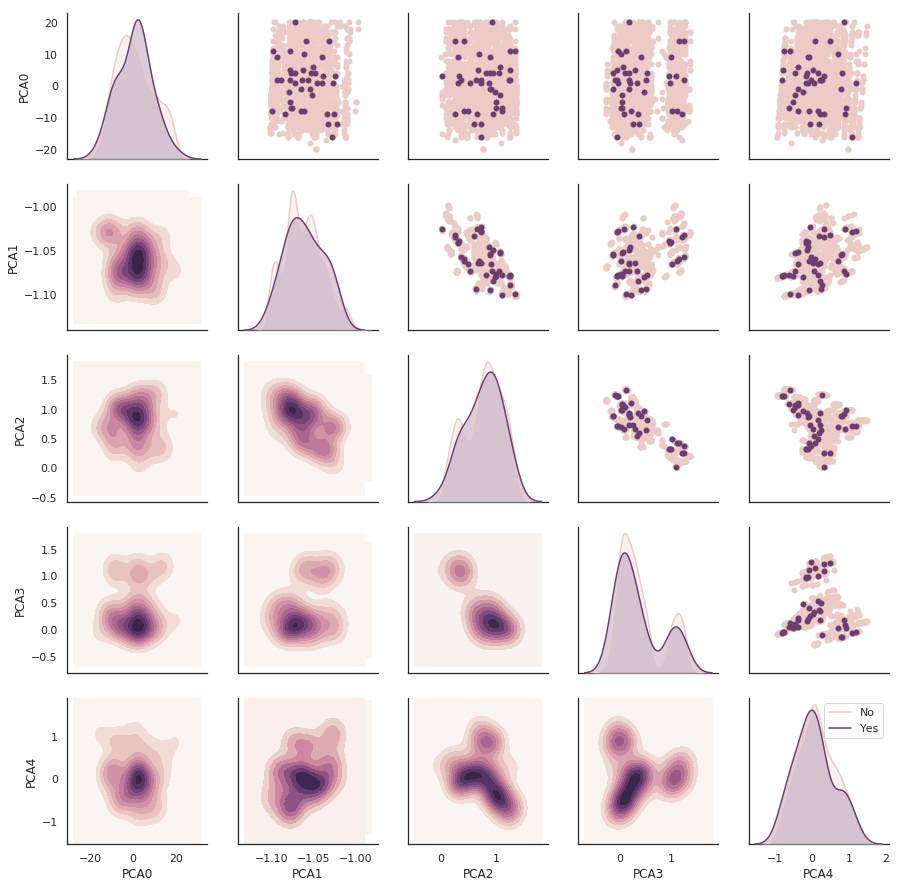

In [41]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)


df = X_pca.copy()
df['y']  = dsdata['y']
df = df[['PCA0','PCA1','PCA2','PCA3','PCA4','y']]
df = df.iloc[:2000]
g = sns.PairGrid(df, diag_sharey=False, hue='y', palette=pal)
g.map_lower(sns.kdeplot, cmap=cmap, shade=True)
g.map_upper(sns.scatterplot, linewidth=0)
g.map_diag(sns.kdeplot, shade=True)
plt.legend(['No','Yes'])
plt.show()

In [42]:
'''
colors = [plt.cm.jet(float(i)/max(euclidean)) for i in euclidean]
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(pcaX[:, 0], pcaX[:, 1], c=colors, edgecolors='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
plt.show()
'''
a = 0

### Z-score

In [43]:
#NORMALIZATION????

In [44]:
from scipy import stats

dsn5 = dsn4.copy()

zX = np.abs(stats.zscore(X))




In [45]:
X.shape

(41188, 32)

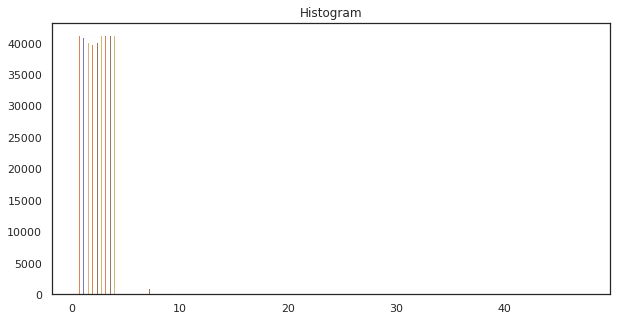

In [46]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram")
    ax = plt.hist(zX)

histogram(zX)

In [47]:
dsn5 = dsn5[(zX < 10).all(axis=1)]
dsn5 = dsn5.drop(columns = ['dec','illiterate'])
dsn5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40982 entries, 0 to 41187
Data columns (total 30 columns):
age                    40982 non-null int64
housing                40982 non-null int8
loan                   40982 non-null int8
contact                40982 non-null int8
previous               40982 non-null int64
emp.var.rate           40982 non-null float64
blue-collar            40982 non-null uint8
entrepreneur           40982 non-null uint8
housemaid              40982 non-null uint8
management             40982 non-null uint8
retired                40982 non-null uint8
self-employed          40982 non-null uint8
services               40982 non-null uint8
student                40982 non-null uint8
technician             40982 non-null uint8
unemployed             40982 non-null uint8
married                40982 non-null uint8
basic.6y               40982 non-null uint8
basic.9y               40982 non-null uint8
high.school            40982 non-null uint8
professional

In [48]:
X = dsn5#.drop(columns=['y'])
Y = dsdata['y'][X.index].astype("category").cat.codes

# Prediction

In [49]:
sns.set_style('whitegrid')

Distribution of OLS residuals


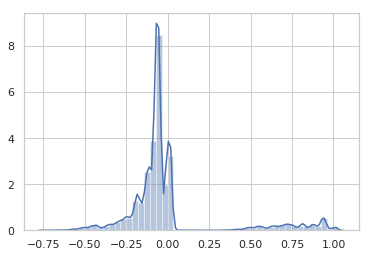

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        12:51:29   Log-Likelihood:                -7499.4
No. Observations:               40982   AIC:                         1.506e+04
Df Residuals:                   40951   BIC:                         1.533e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0784      0.012      6.796      0.000       0.056       0.101
x1             0.0003      0.000      1.584      0.113   -6.29e-05       0.001
x2            -0.0036      0.003     -1.229      0.219      -0.009       0.002
x3            -0.0024      0.004     -0.612      0.540      -0.010       0.005
x4             0.0280      0.005      6.033      0.000       0.019       0.037
x5             0.0689      0.003     20.936      0.000       0.062       0.075
x6            -0.0533      0.001    -36.358      0.000      -0.056      -0.050
x7            -0.0210      0.005     -4.024      0.000      -0.031      -0.011
x8            -0.0182      0.008     -2.215      0.027      -0.034      -0.002
x9            -0.0058      0.010     -0.590      0.555      -0.025       0.013
x10           -0.0119      0.006     -1.922      0.055      -0.024       0.000
x11            0.0467      0.009      5.351      0.000       0.030       0.064
x12           -0.0158      0.008     -1.907      0.056      -0.032       0.000
x13           -0.0179      0.006     -3.114      0.002      -0.029      -0.007
x14            0.0768      0.011      7.139      0.000       0.056       0.098
x15           -0.0067      0.005     -1.315      0.189      -0.017       0.003
x16            0.0031      0.010      0.322      0.748      -0.016       0.022
x17           -0.0031      0.003     -0.984      0.325      -0.009       0.003
x18            0.0042      0.008      0.555      0.579      -0.011       0.019
x19           -0.0056      0.006     -0.950      0.342      -0.017       0.006
x20           -0.0008      0.006     -0.128      0.898      -0.013       0.011
x21            0.0030      0.007      0.445      0.657      -0.010       0.016
x22            0.0117      0.006      1.895      0.058      -0.000       0.024
x23            0.0482      0.008      6.212      0.000       0.033       0.063
x24            0.0649      0.008      8.401      0.000       0.050       0.080
x25            0.0322      0.008      4.203      0.000       0.017       0.047
x26            0.2771      0.014     20.205      0.000       0.250       0.304
x27           -0.0501      0.007     -7.618      0.000      -0.063      -0.037
x28           -0.0266      0.008     -3.528      0.000      -0.041      -0.012
x29            0.1592      0.012     12.856      0.000       0.135       0.183
x30            0.1716      0.014     12.636      0.000       0.145       0.198
==============================================================================
Omnibus:                    16055.176   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54369.207
Skew:                           2.047   Prob(JB):                         0.00
Kurtosis:                       6.884   Cond. No.                         569.
==

In [50]:
X_ = sm.add_constant(X)
model = sm.OLS(Y.values,X_.values).fit()

print("Distribution of OLS residuals")
sns.distplot(model.resid)
plt.show()
display(model.summary())


In [51]:
alpha = 0.05
a = model.pvalues < alpha

X2 = X_[X_.columns[a]]
X2 = sm.add_constant(X2)
print("Not Statistically significant regressors are:")
print(list(X_.columns[~a]))

Not Statistically significant regressors are:
['age', 'housing', 'loan', 'housemaid', 'management', 'self-employed', 'technician', 'unemployed', 'married', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']


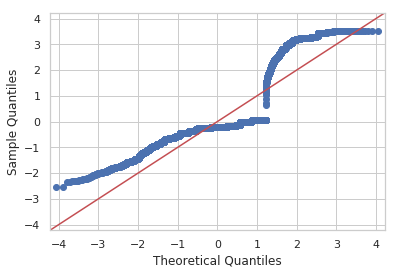

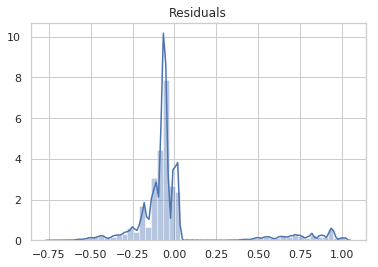

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     209.8
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        12:51:29   Log-Likelihood:                -7512.4
No. Observations:               40982   AIC:                         1.506e+04
Df Residuals:                   40965   BIC:                         1.521e+04
Df Model:                          16                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0852      0.009      9.562      0.000       0.068       0.103
x1             0.0286      0.006      5.146      0.000       0.018       0.039
x2             0.0691      0.005     13.511      0.000       0.059       0.079
x3            -0.0535      0.002    -25.845      0.000      -0.058      -0.049
x4            -0.0231      0.003     -7.055      0.000      -0.030      -0.017
x5            -0.0142      0.007     -1.923      0.054      -0.029       0.000
x6             0.0528      0.010      5.354      0.000       0.033       0.072
x7            -0.0189      0.005     -4.068      0.000      -0.028      -0.010
x8             0.0755      0.015      4.995      0.000       0.046       0.105
x9             0.0505      0.011      4.711      0.000       0.029       0.071
x10            0.0651      0.010      6.266      0.000       0.045       0.086
x11            0.0323      0.010      3.219      0.001       0.013       0.052
x12            0.2786      0.023     12.254      0.000       0.234       0.323
x13           -0.0508      0.009     -5.864      0.000      -0.068      -0.034
x14           -0.0263      0.010     -2.754      0.006      -0.045      -0.008
x15            0.1601      0.021      7.744      0.000       0.120       0.201
x16            0.1731      0.023      7.646      0.000       0.129       0.218
==============================================================================
Omnibus:                    16068.502   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54440.056
Skew:                           2.049   Prob(JB):                         0.00
Kurtosis:                       6.885   Cond. No.                         21.7
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Variance Inflation Factors:
20.101149387319225 const
2.422065133877624 contact
1.2460680853156145 previous
2.520688776253583 emp.var.rate
1.1301870909880898 blue-collar
1.0327589250215072 entrepreneur
1.0515458912729676 retired
1.074479167947403 services
1.0428206258561825 student
3.7105198902444836 aug
4.153855226010439 jul
3.204451477210395 jun
1.1975769584347051 mar
4.661552235464079 may
2.466127268253984 nov
1.2788962321199044 oct
1.225215358878504 sep


In [52]:
model2 = sm.OLS(Y.values,X2.values).fit(cov_type='HC0')
sm.qqplot(model2.resid, sc.norm, fit=True, line='45')
plt.show()
sns.distplot(model2.resid)
plt.title('Residuals')
plt.show()
display(model2.summary())
print("Variance Inflation Factors:")
print_VIF(X2)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X2.values, Y.values, test_size=0.25)

reg = LinearRegression()
reg = reg.fit(X_train,Y_train)

y_hat = reg.predict(X_test)

print('Test accuracy:',np.round(reg.score(np.round(X_test), Y_test),3), ', MSE Loss is:', mean_squared_error(Y_test,y_hat))

Test accuracy: 0.127 , MSE Loss is: 0.08715482847747089


# Classification

In [54]:
def plot_hist2(df,df2,df_col):
    df = df.dropna()  
    df2 = df2.dropna() 
    for d in df_col:
        print("Empirical Distribution of Variable "+d)
        fig, axes = plt.subplots(1,2,figsize=(15,9))
        sns.distplot(df[d],ax=axes[0])
        sns.distplot(df2[d],ax=axes[1])
        axes[0].set_ylabel("Probability")
        axes[1].set_ylabel("Probability")
        plt.suptitle("Empirical Probability Distribution of Numerical Variable "+d)
        plt.show()
        
def get_num_cols(df):
    idx = df.select_dtypes(exclude='object').columns.values
    dF = df[idx].dropna() #remove NaNs or else it cant plot
    return dF.columns

def calculate_metrics(y_test,y_hat):
    c = confusion_matrix(y_test, y_hat)
    print("Confusion matrix is:")
    print(c)
    print("We have",c[0][0]+c[1][1],"correct observations and",c[0][1]+c[1][0], "misclassifications.")
    print(classification_report(y_test, y_hat))
    sns.heatmap(c,cmap="YlGnBu",annot=True)
    plt.show()
    
def plot_ROC(y_test,X_test,classifier):
    roc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr, label='Classifier area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()
    
    
def plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME):
    
    plt.figure(figsize=(7,7))
    for i in range(len(L_Y)):
        roc = roc_auc_score(L_Y[i], L_YHAT[i])
        fpr, tpr, _ = roc_curve(L_Y[i], L_PROB[i][:,1])
        plt.plot(fpr, tpr, label=L_NAME[i]+', area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()
    
    
def MAE(y_test,y_hat):
    return np.abs(y_test-y_hat).sum()#/y_test.shape[0]


## Logistic Regression with PCA

In [55]:
pcaXmodel = PCA(n_components=5, whiten=True)
pc = pcaXmodel.fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))
print(pcaXmodel.explained_variance_ratio_[:5])

proj = pcaXmodel.inverse_transform(pc)
a = pd.DataFrame(proj)[list(np.ones((5,1)).cumsum().ravel())]

X_train, X_test, y_train, y_test = train_test_split(a, Y, test_size=0.3,  random_state=0)
lr = LogisticRegression().fit(X_train,y_train)

y_hat = lr.predict(X_test)
print('Test accuracy:',np.round(lr.score(X_test, y_test),3), ', Cross Entropy Loss is:', log_loss(y_test,y_hat))
print(MAE(y_test,y_hat))

#pcaXmodel = PCA(n_components=5).fit_transform(X)#.fit_transform(StandardScaler().fit_transform(X))

[0.95069157 0.02257873 0.00352774 0.00251255 0.00235718]
Test accuracy: 0.888 , Cross Entropy Loss is: 3.885086144850827
1383


Confusion matrix is:
[[10900     8]
 [ 1375    12]]
We have 10912 correct observations and 1383 misclassifications.
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10908
           1       0.60      0.01      0.02      1387

   micro avg       0.89      0.89      0.89     12295
   macro avg       0.74      0.50      0.48     12295
weighted avg       0.86      0.89      0.84     12295



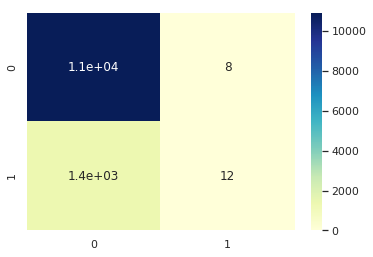

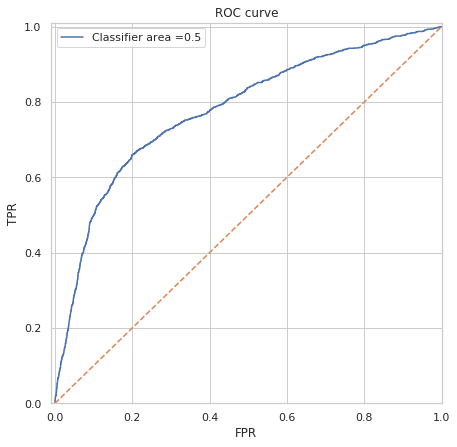

In [56]:
calculate_metrics(y_test,y_hat)
plot_ROC(y_test,X_test,lr)

In [57]:
logit = sm.Logit(Y.values, a.values).fit()
display(logit.summary())    

Optimization terminated successfully.
         Current function value: 0.299883
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                40982
Model:                          Logit   Df Residuals:                    40977
Method:                           MLE   Df Model:                            4
Date:                Thu, 09 May 2019   Pseudo R-squ.:                  0.1391
Time:                        12:51:30   Log-Likelihood:                -12290.
converged:                       True   LL-Null:                       -14276.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.7456      0.330     -8.318      0.000      -3.392      -2.099
x2            -1.3697      1.709     -0.801      0.423      -4.720       1.980
x3            -2.1759      0.120    -18.060      0.000      -2.412      -1.940
x4             0.1614      0.431      0.374      0.708      -0.683       1.006
x5            -0.3369      0.056     -6.038      0.000      -0.446      -0.228
==============================================================================
"""

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.25)

In [60]:
# Try
%%script false

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for c,var in enumerate(classifiers):
    clf = var
    clf = clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    print(c,var,"Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
    print('\n')

UsageError: Line magic function `%%script` not found.


### AdaBoost Classifier

In [ ]:
clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)
MAE(Y_test,y_hat)

### SVC 

In [ ]:
%% script false
clf_rdfore = SVC(probability=True)
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)



# Unbalanced Data Problem

In [61]:
sns.set_style('whitegrid')

In [62]:
def make_balanced(X,Y):
    DF = X.copy()
    DF['Y'] = Y
    DF_Yes = DF[DF.Y==1]#.info()
    DF_No = DF[DF.Y==0]#.info()
    DF_B = DF_No.sample(len(DF_Yes))
    D = pd.concat([DF_B,DF_Yes])
    D = D.reindex(np.random.permutation(D.index))
    D = D[:int(len(D)/2)]#, D[int(len(D)/2):]
    return D

In [63]:
D = make_balanced(X,Y)

In [64]:
D.shape

(4544, 31)

In [65]:
X_B = D.drop(columns='Y')
Y_B = D['Y']

Test accuracy: 0.749 , Cross Entropy Loss is: 8.665154260866162
Confusion matrix is:
[[495  80]
 [205 356]]
We have 851 correct observations and 285 misclassifications.
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       575
           1       0.82      0.63      0.71       561

   micro avg       0.75      0.75      0.75      1136
   macro avg       0.76      0.75      0.75      1136
weighted avg       0.76      0.75      0.75      1136



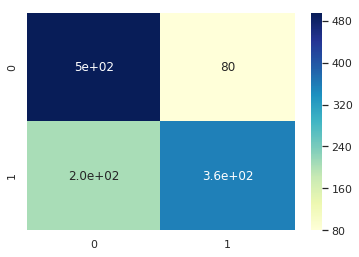

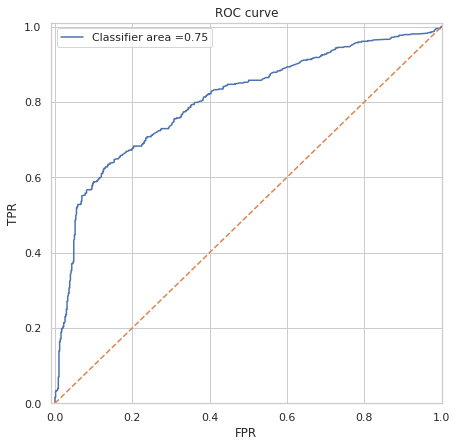

285

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_B.values, Y_B.values, test_size=0.25)
clf_rdfore = AdaBoostClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

y_hat = clf_rdfore.predict(X_test)


print('Test accuracy:',np.round(clf_rdfore.score(X_test, Y_test),3), ', Cross Entropy Loss is:', log_loss(Y_test,y_hat))
calculate_metrics(Y_test,y_hat)
plot_ROC(Y_test,X_test,clf_rdfore)
MAE(Y_test,y_hat)

In [67]:
X_R = X.drop(D.index)
Y_R = Y.drop(D.index)

Test accuracy: 0.836 , Cross Entropy Loss is: 5.665577794328502
Confusion matrix is:
[[29042  5074]
 [  903  1419]]
We have 30461 correct observations and 5977 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     34116
           1       0.22      0.61      0.32      2322

   micro avg       0.84      0.84      0.84     36438
   macro avg       0.59      0.73      0.61     36438
weighted avg       0.92      0.84      0.87     36438



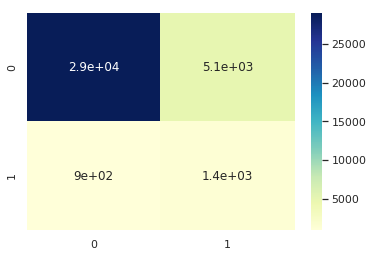

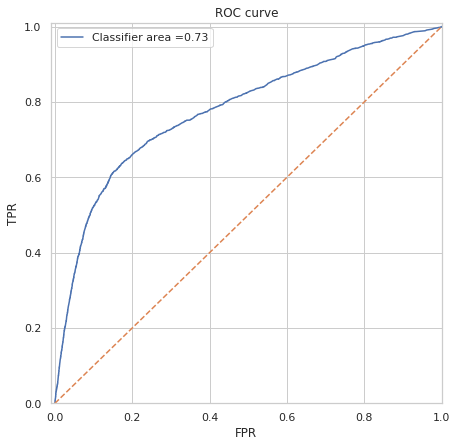

0    34116
1     2322
dtype: int64


In [68]:
#XB_train, XB_test, YB_train, YB_test = train_test_split(X_B.values, Y_B.values, test_size=0.25)

ada = AdaBoostClassifier()
ada = ada.fit(X_B,Y_B)

y_hat = ada.predict(X_R)


print('Test accuracy:',np.round(ada.score(X_R, Y_R),3), ', Cross Entropy Loss is:', log_loss(Y_R,y_hat))
calculate_metrics(Y_R,y_hat)
plot_ROC(Y_R,X_R,ada)
MAE(Y_R,y_hat)
print(Y_R.value_counts())

## Test Over/Under Sampling Methods

In [69]:
def plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME):
    
    plt.figure(figsize=(7,7))
    for i in range(len(L_Y)):
        roc = roc_auc_score(L_Y[i], L_YHAT[i])
        fpr, tpr, _ = roc_curve(L_Y[i], L_PROB[i][:,1])
        plt.plot(fpr, tpr, label=L_NAME[i]+', area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()


In [70]:
c = StratifiedKFold(n_splits=3)


classifier = ['AdaBoost', AdaBoostClassifier()]

over_samplers = [
    ['ADA-SYN', ADASYN()],
    ['ROS', RandomOverSampler()],
    ['SMOTE', SMOTE()],
]

under_samplers = [
    #['Centroids', ClusterCentroids()],
    ['RUS', RandomUnderSampler()],
    ['IHT', InstanceHardnessThreshold()],
    ['RENN', RepeatedEditedNearestNeighbours()],
    #['NCR', NeighbourhoodCleaningRule()],
]

over_pipelines = [
    ['{}-{}'.format(s[0], classifier[0]),
     make_pipeline(s[1], classifier[1])]
    for s in over_samplers
]

under_pipelines = [
    ['{}-{}'.format(s[0], classifier[0]),
     make_pipeline(s[1], classifier[1])]
    for s in under_samplers
]

def calc_sampling(pipelines,X,Y):
    L_NAME, L_X, L_Y, L_YHAT, L_PROB = [],[],[],[],[]
    for name, pipeline in pipelines:
        for i, (train, test) in enumerate(c.split(X.values, Y.values)):
            if i == 0:
                probs = pipeline.fit(X.values[train], Y.values[train]).predict_proba(X.values[test])
                y_hat = pipeline.fit(X.values[train], Y.values[train]).predict(X.values[test])
                #fpr, tpr, thresholds = roc_curve(Y.values[test], probs[:, 1])
                
                print(name)
                calculate_metrics(Y.values[test],y_hat)
                #plot_ROC2(Y.values[test],X.values[test],y_hat,probs)
                L_NAME.append(name)
                L_X.append(X.values[test])
                L_Y.append(Y.values[test])
                L_YHAT.append(y_hat)
                L_PROB.append(probs)

    plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)

ADA-SYN-AdaBoost
Confusion matrix is:
[[12146     0]
 [ 1366   149]]
We have 12295 correct observations and 1366 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12146
           1       1.00      0.10      0.18      1515

   micro avg       0.90      0.90      0.90     13661
   macro avg       0.95      0.55      0.56     13661
weighted avg       0.91      0.90      0.86     13661



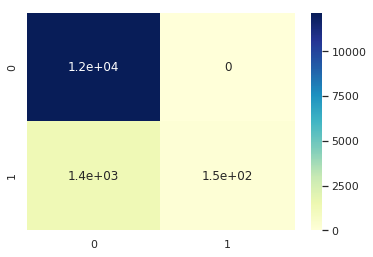

ROS-AdaBoost
Confusion matrix is:
[[12146     0]
 [ 1339   176]]
We have 12322 correct observations and 1339 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12146
           1       1.00      0.12      0.21      1515

   micro avg       0.90      0.90      0.90     13661
   macro avg       0.95      0.56      0.58     13661
weighted avg       0.91      0.90      0.87     13661



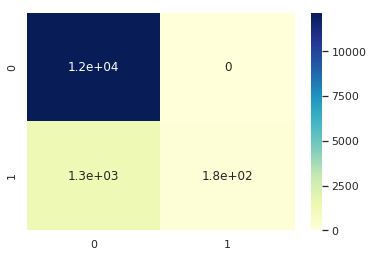

SMOTE-AdaBoost
Confusion matrix is:
[[12146     0]
 [ 1363   152]]
We have 12298 correct observations and 1363 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12146
           1       1.00      0.10      0.18      1515

   micro avg       0.90      0.90      0.90     13661
   macro avg       0.95      0.55      0.56     13661
weighted avg       0.91      0.90      0.86     13661



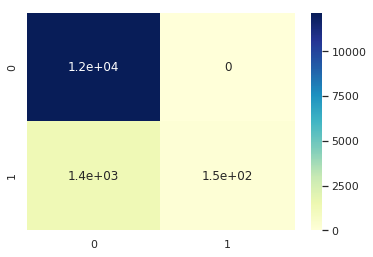

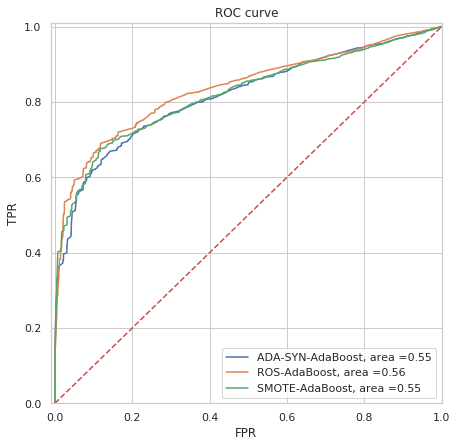

In [71]:
calc_sampling(over_pipelines,X,Y)

RUS-AdaBoost
Confusion matrix is:
[[12146     0]
 [ 1338   177]]
We have 12323 correct observations and 1338 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12146
           1       1.00      0.12      0.21      1515

   micro avg       0.90      0.90      0.90     13661
   macro avg       0.95      0.56      0.58     13661
weighted avg       0.91      0.90      0.87     13661



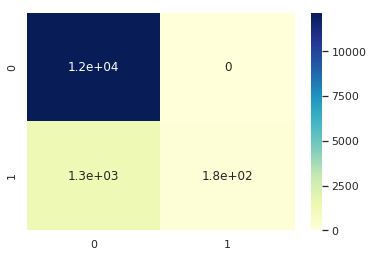

IHT-AdaBoost
Confusion matrix is:
[[12146     0]
 [ 1107   408]]
We have 12554 correct observations and 1107 misclassifications.
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12146
           1       1.00      0.27      0.42      1515

   micro avg       0.92      0.92      0.92     13661
   macro avg       0.96      0.63      0.69     13661
weighted avg       0.93      0.92      0.90     13661



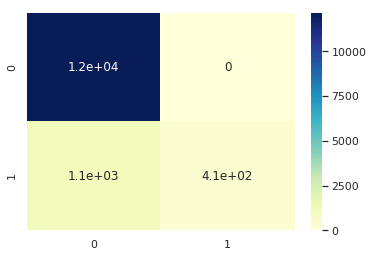

RENN-AdaBoost
Confusion matrix is:
[[12146     0]
 [ 1373   142]]
We have 12288 correct observations and 1373 misclassifications.
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     12146
           1       1.00      0.09      0.17      1515

   micro avg       0.90      0.90      0.90     13661
   macro avg       0.95      0.55      0.56     13661
weighted avg       0.91      0.90      0.86     13661



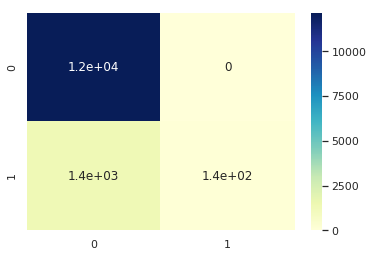

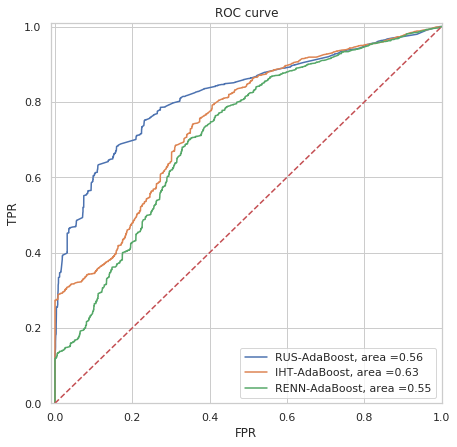

In [72]:
calc_sampling(under_pipelines,X,Y)

## Final Test of Classifiers

In [73]:

    
def plot_ROC3(L_Y,L_X,L_CLASS,L_NAME):
    
    plt.figure(figsize=(7,7))
    for i in range(len(L_Y)):
        roc = roc_auc_score(L_Y[i], L_CLASS[i].predict(L_X))
        
        fpr, tpr, _ = roc_curve(L_Y[i], L_CLASS[i].predict_proba(L_X)[:,1])
        plt.plot(fpr, tpr, label=L_NAME[i]+', area ='+str(np.round(roc,2)))
    plt.plot([0, 1], [0, 1],'--')

    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend()

    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.show()

Test accuracy: 0.8 , Cross Entropy Loss is: 6.9158594317098006
Confusion matrix is:
[[27646  6470]
 [  826  1496]]
We have 29142 correct observations and 7296 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     34116
           1       0.19      0.64      0.29      2322

   micro avg       0.80      0.80      0.80     36438
   macro avg       0.58      0.73      0.59     36438
weighted avg       0.92      0.80      0.85     36438



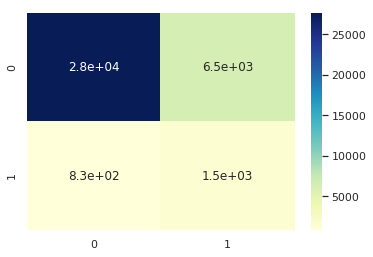

MAE: 7296
Test accuracy: 0.836 , Cross Entropy Loss is: 5.665577794328502
Confusion matrix is:
[[29042  5074]
 [  903  1419]]
We have 30461 correct observations and 5977 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     34116
           1       0.22      0.61      0.32      2322

   micro avg       0.84      0.84      0.84     36438
   macro avg       0.59      0.73      0.61     36438
weighted avg       0.92      0.84      0.87     36438



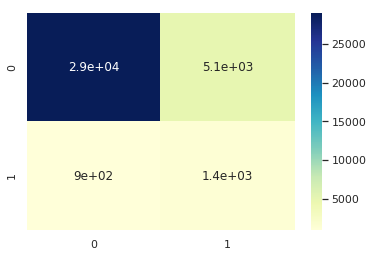

MAE: 5977
Test accuracy: 0.724 , Cross Entropy Loss is: 9.535854646706174
Confusion matrix is:
[[24885  9231]
 [  829  1493]]
We have 26378 correct observations and 10060 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     34116
           1       0.14      0.64      0.23      2322

   micro avg       0.72      0.72      0.72     36438
   macro avg       0.55      0.69      0.53     36438
weighted avg       0.91      0.72      0.79     36438



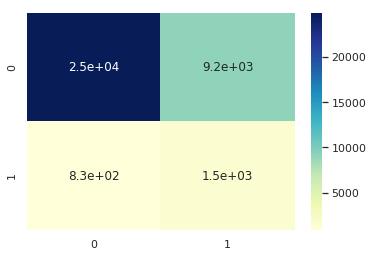

MAE: 10060
Test accuracy: 0.718 , Cross Entropy Loss is: 9.732069615586205
Confusion matrix is:
[[24692  9424]
 [  843  1479]]
We have 26171 correct observations and 10267 misclassifications.
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     34116
           1       0.14      0.64      0.22      2322

   micro avg       0.72      0.72      0.72     36438
   macro avg       0.55      0.68      0.53     36438
weighted avg       0.91      0.72      0.79     36438



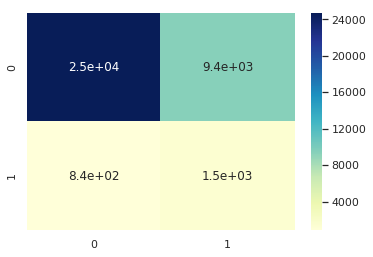

MAE: 10267


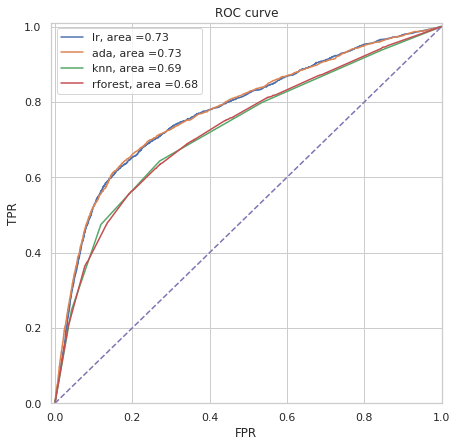

In [74]:
C = [LogisticRegression(), AdaBoostClassifier(), KNeighborsClassifier(), RandomForestClassifier()]
L_NAME = ['lr','ada','knn','rforest']
L_X, L_Y, L_YHAT, L_PROB = [],[],[],[]

for cl in C:
    c = cl.fit(X_B,Y_B)

    y_hat = c.predict(X_R)
    probs = c.predict_proba(X_R)

    print('Test accuracy:',np.round(c.score(X_R, Y_R),3), ', Cross Entropy Loss is:', log_loss(Y_R,y_hat))
    calculate_metrics(Y_R,y_hat)
    #plot_ROC(Y_R,X,c)
    print('MAE:',MAE(Y_R,y_hat))
    
                    #L_NAME.append(name)
    L_X.append(X_R.values)
    L_Y.append(Y_R.values)
    L_YHAT.append(y_hat)
    L_PROB.append(probs)

plot_ROC2(L_Y,L_X,L_YHAT,L_PROB,L_NAME)

#plot_ROC3(L_Y,L_X,L_CLASS,L_NAME)
L_X, L_Y, L_YHAT, L_CLASS, l_NAME = [],[],[],[],[]